<a href="https://colab.research.google.com/github/sooonsyk/ESAA/blob/main/0411_AppleStock_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

### Step 3. Assign it to a variable apple

In [3]:
apple = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv')

### Step 4.  Check out the type of the columns

In [4]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8465 non-null   object 
 1   Open       8465 non-null   float64
 2   High       8465 non-null   float64
 3   Low        8465 non-null   float64
 4   Close      8465 non-null   float64
 5   Volume     8465 non-null   int64  
 6   Adj Close  8465 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 463.1+ KB


### Step 5. Transform the Date column as a datetime type

In [34]:
apple = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv', parse_dates=[0])
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       8465 non-null   datetime64[ns]
 1   Open       8465 non-null   float64       
 2   High       8465 non-null   float64       
 3   Low        8465 non-null   float64       
 4   Close      8465 non-null   float64       
 5   Volume     8465 non-null   int64         
 6   Adj Close  8465 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 463.1 KB


### Step 6.  Set the date as the index

In [44]:
apple.set_index('Date', inplace=True, drop=False)
apple.index.name = ''
apple

,Date,Open,High,Low,Close,Volume,Adj Close
,,,,,,,
2014-07-08,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
...,...,...,...,...,...,...,...
1980-12-18,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
1980-12-17,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-16,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39


### Step 7.  Is there any duplicate dates?

In [73]:
apple.index.unique()
#8465개로 동일하므로 없음

DatetimeIndex(['1980-12-12', '1980-12-15', '1980-12-16', '1980-12-17',
               '1980-12-18', '1980-12-19', '1980-12-22', '1980-12-23',
               '1980-12-24', '1980-12-26',
               ...
               '2014-06-24', '2014-06-25', '2014-06-26', '2014-06-27',
               '2014-06-30', '2014-07-01', '2014-07-02', '2014-07-03',
               '2014-07-07', '2014-07-08'],
              dtype='datetime64[ns]', name='', length=8465, freq=None)

### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [45]:
apple = apple.sort_values(by="Date",ascending=True)
apple

,Date,Open,High,Low,Close,Volume,Adj Close
,,,,,,,
1980-12-12,1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
...,...,...,...,...,...,...,...
2014-07-01,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
2014-07-02,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-03,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03


### Step 9. Get the last business day of each month

In [46]:
apple['month'] = pd.DatetimeIndex(apple.Date).month
apple['day'] = pd.DatetimeIndex(apple.Date).day
apple.groupby(by='month')[['day']].max()

,day
month,
1,31
2,29
3,31
4,30
5,31
6,30
7,31
8,31
9,30


In [90]:
pd.date_range(apple.index.min() , apple.index.max() , freq="M")

DatetimeIndex(['1980-12-31', '1981-01-31', '1981-02-28', '1981-03-31',
               '1981-04-30', '1981-05-31', '1981-06-30', '1981-07-31',
               '1981-08-31', '1981-09-30',
               ...
               '2013-09-30', '2013-10-31', '2013-11-30', '2013-12-31',
               '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-31', '2014-06-30'],
              dtype='datetime64[ns]', length=403, freq='M')

### Step 10.  What is the difference in days between the first day and the oldest

In [84]:
(apple.Date.max() - apple.Date.min()).days

12261

### Step 11.  How many months in the data we have?

In [53]:
apple.month.unique()

array([12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [75]:
apple.month.count()

8465

In [83]:
len(apple.index.month)

8465

In [79]:
apple.groupby('month').count()['Date']

month
1     705
2     652
3     744
4     703
5     718
6     727
7     703
8     730
9     669
10    728
11    675
12    711
Name: Date, dtype: int64

In [92]:
apple['year'] = pd.DatetimeIndex(apple.Date).year
apple.groupby(['year','month']).count().info()
#row의 개수 404개

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 404 entries, (1980, 12) to (2014, 7)
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Date       404 non-null    int64
 1   Open       404 non-null    int64
 2   High       404 non-null    int64
 3   Low        404 non-null    int64
 4   Close      404 non-null    int64
 5   Volume     404 non-null    int64
 6   Adj Close  404 non-null    int64
 7   day        404 non-null    int64
dtypes: int64(8)
memory usage: 26.5 KB


### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

(array([6451.,  543.,  375.,  142.,  185.,  164.,  151.,  202.,  175.,
          77.]),
 array([ 0.17 ,  9.781, 19.392, 29.003, 38.614, 48.225, 57.836, 67.447,
        77.058, 86.669, 96.28 ]),
 <a list of 10 Patch objects>)

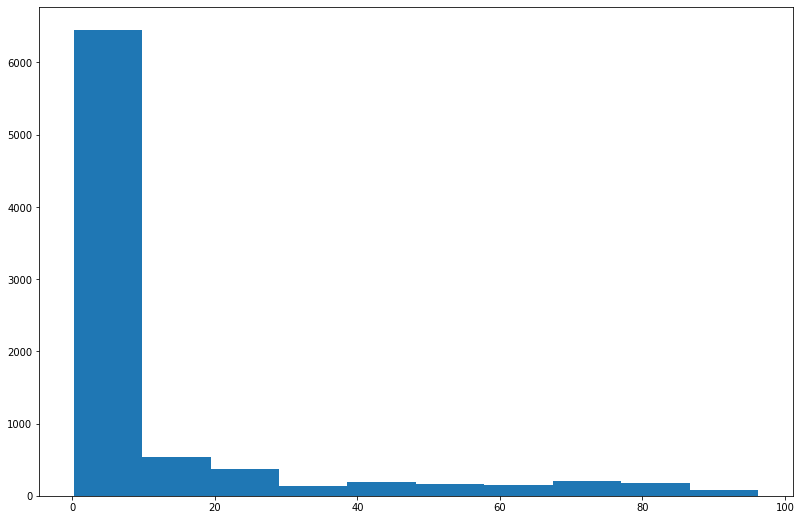

In [62]:
plt.figure(figsize=(13.5, 9))
plt.hist(apple['Adj Close'])

### BONUS: Create your own question and answer it.